In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def pad_image(img, pad=1):
    r ,c = img.shape # sixe of original image
    new_img= np.zeros((r+2*pad, c+2*pad)) #create new image with all value zeros of extra size 
    for i in range(r):
        for j in range(c):
            new_img[i+pad][j+pad]=img[i][j]  
    return new_img

In [3]:
def conv(img, kernel, stride=1):
    r,c = img.shape
    kr,kc = kernel.shape
    new_img = np.zeros((r-kr+1, c-kc+1))
    for i in range(0,r-kr+1,stride):
        for j in range(0,c-kc+1,stride):
            acc=0
            for p in range(kr):
                for q in range(kc):
                    acc += img[i+p][j+q]*kernel[p][q]
            new_img[i][j]=int(acc)
    return new_img

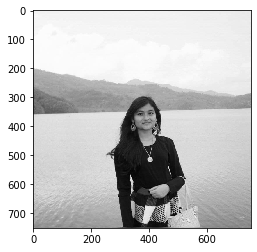

In [4]:
img = cv2.imread("images/image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

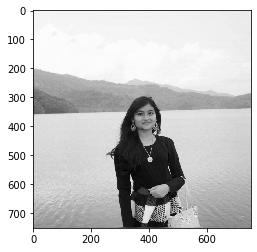

In [5]:
padded_img = pad_image(img)
plt.imshow(padded_img, cmap='gray')

In [6]:
h_kernel= np.array([[-1,-1,-1],
                    [ 0, 0, 0],
                    [ 1, 1, 1]])
edge = conv(padded_img,h_kernel)

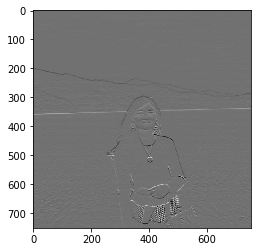

In [7]:
plt.imshow(edge, cmap='gray')

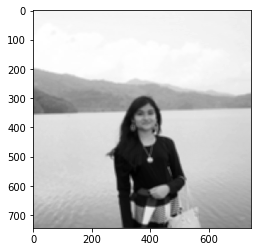

In [8]:
blur =(1/81)* np.array([[1,1,1,1,1,1,1,1,1],
                        [1,1,1,1,1,1,1,1,1],
                        [1,1,1,1,1,1,1,1,1],
                        [1,1,1,1,1,1,1,1,1],
                        [1,1,1,1,1,1,1,1,1],
                        [1,1,1,1,1,1,1,1,1],
                        [1,1,1,1,1,1,1,1,1],
                        [1,1,1,1,1,1,1,1,1],
                        [1,1,1,1,1,1,1,1,1]])
bl = conv(padded_img,blur)
plt.imshow(bl, cmap='gray')

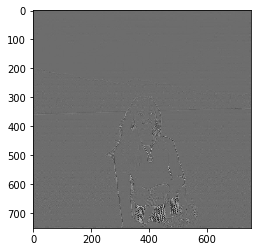

In [9]:
kernel= np.array([[ 0,-1, 0],
                  [-1, 4,-1],
                  [ 0,-1, 0]])
edge_detected_img = conv(padded_img, kernel)
plt.imshow(edge_detected_img, cmap='gray')

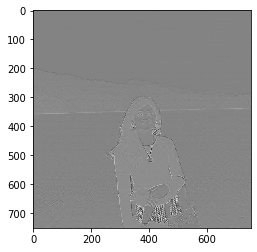

In [10]:
curve = np.array([[30,-30,0],
                 [-10,0,-12],
                 [0,-5,25]])
filtered10 = conv(padded_img, curve)
plt.imshow(filtered10, cmap='gray')

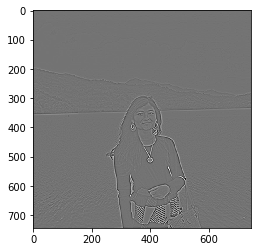

In [11]:
kernel= np.array([[ 0, 0, 0,-1,-1,-1, 0, 0, 0],
                  [ 0, 0, 0,-1,-1,-1, 0, 0, 0],
                  [ 0, 0, 0,-1,-1,-1, 0, 0, 0],
                  [-1,-1,-1, 4, 4, 4,-1,-1,-1],
                  [-1,-1,-1, 4, 4, 4,-1,-1,-1],
                  [-1,-1,-1, 4, 4, 4,-1,-1,-1],
                  [ 0, 0, 0,-1,-1,-1, 0, 0, 0],
                  [ 0, 0, 0,-1,-1,-1, 0, 0, 0],
                  [ 0, 0, 0,-1,-1,-1, 0, 0, 0],])
edge_detected_img = conv(padded_img, kernel)
plt.imshow(edge_detected_img, cmap='gray')

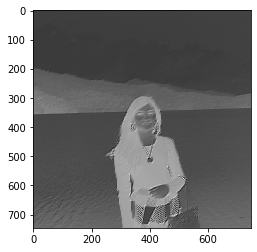

In [14]:
curved = np.array([[ 20, 20,-10,-10,-10,  0,  0],
                   [ 20, 20,-10,-10,-10,  0,  0],
                   [-10,-10,  0,  0,  0,-10,-10],
                   [-10,-10,  0,  0,  0,-10,-10],
                   [-10,-10,  0,  0,  0,-10,-10],
                   [  0,  0,-10,-10,-10, 20, 20],
                   [  0,  0,-10,-10,-10, 20, 20]])
curve_detected = conv(padded_img, curved)
plt.imshow(curve_detected, cmap='gray')